# Data visualization quality with SPRITE Part 2

Uses DynamicViz visualization scores to assess data visualization quality after SPRITE post-processing. Relies on outputs from the Part 1 notebook. Generates results associated with Figure 4 of the manuscript.

In [1]:
from dynamicviz import viz, score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import os
import pickle
import seaborn as sns

/home/edsun/anaconda3/envs/dynamicviz_installation/lib/python3.8/site-packages/dynamicviz/viz.py:17: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
/home/edsun/anaconda3/envs/dynamicviz_installation/lib/python3.8/site-packages/dynamicviz/viz.py:18: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


In [2]:
# dictionary for mapping keys to detailed labels

dataset_mapper = {"Dataset3": "Mouse Hipp.\n(seqFISH)",
                  "Dataset9": "Mouse VISP\n(MERFISH)",
                  "Dataset11": "Mouse PC\n(STARmap)", 
                  "Dataset12": "Human MTG\n(ISS)",
                  "Dataset13": "Mouse VISP\n(ISS)",
                  "Dataset14": "Drosophila Embryo\n(FISH)",
                  "Dataset15": "Mouse SC\n(osmFISH)",
                  "Dataset17": "Mouse VISP\n(ExSeq)",
                  "Axolotl": "Axolotl Brain\n(Stereo-seq)",
                  "Dataset7": "Human U2OS\n(MERFISH)",
                  "Dataset1": "Mouse Gast.\n(seqFISH)"}

method_mapper = {"tangram": "Tangram",
                 "spage": "SpaGE",
                 "knn": "Harmony"}

## Generating DynamicViz scores

Note that this section can take a while to run.

In [3]:
models = ["knn", "spage", "tangram"]
with open('visualization_data_for_dynamicviz_dict.pkl', 'rb') as handle:
     results_dict = pickle.load(handle)

In [4]:
metric_names = ['spearman']


comb_df = pd.DataFrame([])

for dataset_name in results_dict.keys():
    for model in models:
        for dr_method in ['umap', 'tsne', 'pca']:
            
            X_orig = results_dict[dataset_name][model]['ground_truth']
            X_measured_dr = results_dict[dataset_name][model]['measured'][dr_method]
            X_base_dr = results_dict[dataset_name][model]['baseline'][dr_method]
            X_sprite_dr = results_dict[dataset_name][model]['sprite'][dr_method]
            
            
            ### MEASURED
            # compile concordance metrics
            X_measured_dr_df = pd.DataFrame(X_measured_dr, columns=['x1','x2'])
            X_measured_dr_df['bootstrap_number'] = -1
            X_measured_dr_df['original_index'] = np.arange(X_measured_dr.shape[0])
            
            mean_metrics = []
            for metric_name in metric_names:
                metrics = score.concordance(X_measured_dr_df, X_orig, method=metric_name, k=20, bootstrap_number=-1)
                mean_metrics.append(np.nanmean(metrics))
                
            # compile results df
            for i in range(len(metric_names)):
                df = pd.DataFrame(np.array(metric_names[i]).reshape((1,1)))
                df.columns = ["metric"]
                df["value"] = mean_metrics[i]
                df["approach"] = "measured"
                df["model"] = model
                df["data"] = dataset_name
                df["dr_method"] = dr_method
                comb_df = pd.concat((comb_df, df))
            
            
            ### BASELINE
            # compile concordance metrics
            X_base_dr_df = pd.DataFrame(X_base_dr, columns=['x1','x2'])
            X_base_dr_df['bootstrap_number'] = -1
            X_base_dr_df['original_index'] = np.arange(X_base_dr.shape[0])
            
            mean_metrics = []
            for metric_name in metric_names:
                metrics = score.concordance(X_base_dr_df, X_orig, method=metric_name, k=20, bootstrap_number=-1)
                mean_metrics.append(np.nanmean(metrics))
                
            # compile results df
            for i in range(len(metric_names)):
                df = pd.DataFrame(np.array(metric_names[i]).reshape((1,1)))
                df.columns = ["metric"]
                df["value"] = mean_metrics[i]
                df["approach"] = "baseline"
                df["model"] = model
                df["data"] = dataset_name
                df["dr_method"] = dr_method
                comb_df = pd.concat((comb_df, df))
                        
            ### SPRITE
            # compile concordance metrics
            X_sprite_dr_df = pd.DataFrame(X_sprite_dr, columns=['x1','x2'])
            X_sprite_dr_df['bootstrap_number'] = -1
            X_sprite_dr_df['original_index'] = np.arange(X_sprite_dr.shape[0])
            
            mean_metrics = []
            for metric_name in metric_names:
                metrics = score.concordance(X_sprite_dr_df, X_orig, method=metric_name, k=20, bootstrap_number=-1)
                mean_metrics.append(np.nanmean(metrics))
                
            # compile results df
            for i in range(len(metric_names)):
                df = pd.DataFrame(np.array(metric_names[i]).reshape((1,1)))
                df.columns = ["metric"]
                df["value"] = mean_metrics[i]
                df["approach"] = "sprite"
                df["model"] = model
                df["data"] = dataset_name
                df["dr_method"] = dr_method
                comb_df = pd.concat((comb_df, df))

In [ ]:
# # save df
# comb_df.to_csv("visualization_data_dynamicviz_metrics.csv")

## Figure 4D: Spearman visualization score across datasets with SPRITE

In [9]:
comb_df = pd.read_csv("visualization_data_dynamicviz_metrics.csv")

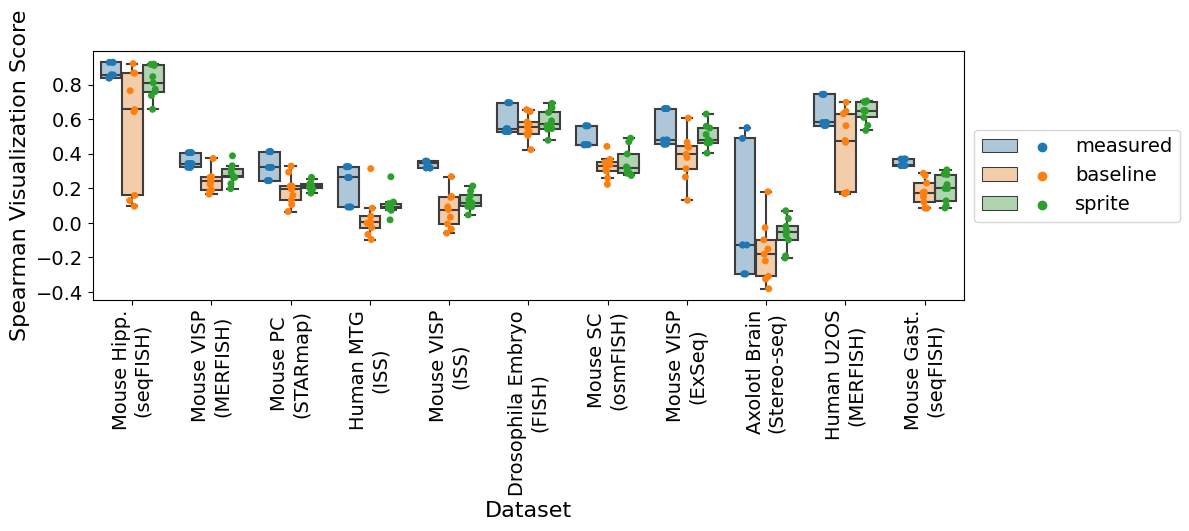

----------------------------------------

Axolotl Brain
(Stereo-seq)

baseline
-0.1811527624524507

measured
-0.1277999857433697

sprite
-0.0545261871124292
----------------------------------------

Drosophila Embryo
(FISH)

baseline
0.5525566367626027

measured
0.5448982376016707

sprite
0.573753593104047
----------------------------------------

Human MTG
(ISS)

baseline
0.0024799258607925

measured
0.2630634398738889

sprite
0.0921700623776316
----------------------------------------

Human U2OS
(MERFISH)

baseline
0.4765202537889612

measured
0.5814644219039885

sprite
0.6496254841397505
----------------------------------------

Mouse Gast.
(seqFISH)

baseline
0.1747097409144467

measured
0.3323558663356745

sprite
0.199873613948577
----------------------------------------

Mouse Hipp.
(seqFISH)

baseline
0.6563302609892057

measured
0.8562588440348036

sprite
0.810849116780865
----------------------------------------

Mouse PC
(STARmap)

baseline
0.1952713226022318

measured
0.321

In [9]:
from matplotlib.legend_handler import HandlerTuple


sub_df = comb_df[comb_df['metric']=="spearman"]

sub_df["data"] = [dataset_mapper[d] for d in sub_df["data"]]
    
plt.figure(figsize=(12,5))
# box plot
ax = sns.boxplot(data=sub_df, x="data", y="value", hue="approach", showfliers=False)
# change box alpha only
for patch in ax.patches:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .4))
# add points
sns.stripplot(data=sub_df, x="data", y="value", hue="approach", dodge=True, ax=ax)
# create custom legend
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=[(handles[0], handles[3]), (handles[1], handles[4]), (handles[2], handles[5])],
          labels=labels,
          loc='center left', bbox_to_anchor=(1, 0.5), fontsize=14, handlelength=4,
          handler_map={tuple: HandlerTuple(ndivide=None)})
# annotate plot
plt.xlabel("Dataset", fontsize=16)
plt.ylabel("Spearman Visualization Score", fontsize=16)
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('plots/sprite_visualization/spearman_all_data.pdf', bbox_inches='tight')
plt.show()

for dataset in np.unique(sub_df["data"]):
    print("----------------------------------------\n")
    print(dataset)
    for pp in np.unique(sub_df["approach"]):
        print("")
        print(pp)
        print(np.nanmedian(sub_df[(sub_df["data"]==dataset)&(sub_df["approach"]==pp)]["value"]))